In [39]:
import pandas_datareader
import pandas_datareader.data as web
import datetime

#  Start Date for fetching the stock data
start = datetime.datetime(1980,1,1)

#  End Date for fetching the stock data
end = datetime.datetime(2019,1,1)

# ford = web.DataReader('F', 'yahoo', start, end)
ford = web.DataReader('F', 'yahoo', start)
# ford = web.DataReader('F', 'yahoo')

In [41]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1979-12-31,1.307747,1.262128,1.302678,1.297609,3915900.0,0.002944
1980-01-02,1.328022,1.287471,1.297609,1.287471,2042900.0,0.002921
1980-01-03,1.287471,1.267196,1.287471,1.287471,2815400.0,0.002921
1980-01-04,1.287471,1.272265,1.287471,1.277334,3037900.0,0.002898
1980-01-07,1.287471,1.267196,1.277334,1.267196,2249900.0,0.002875


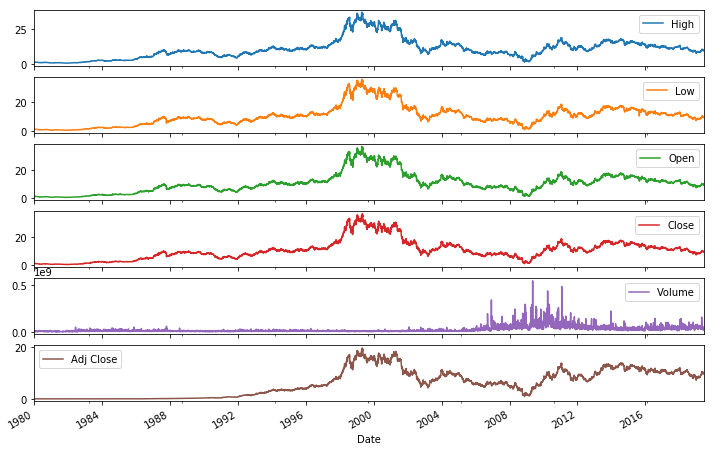

In [48]:
import matplotlib.pyplot as plt
ford.plot(subplots=True, figsize=(12,8), sharex=True)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import quandl

In [7]:
from backtest import Strategy, Portfolio

In [57]:
class RandomForecastingStrategy(Strategy):
    def __init__(self, symbol, bars):
        self.symbol = symbol
        self.bars = bars
        
    def generate_signals(self):
        signals = pd.DataFrame(index=self.bars.index)
        signals['signal'] = np.sign(np.random.randn(len(signals)))
        signals['signal'][0:5] = 0.0
#         print(signals.shape)
#         print(signals.tail(20))
        return signals

In [85]:
class MarketOnOpenPortfolio(Portfolio):
    def __init__(self, symbol, bars, signals, initial_capital=100000.0):
        self.symbol = symbol
        self.bars = bars
        self.signals = signals
        self.initial_capital = initial_capital
        self.positions = self.generate_positions()
        
    def generate_positions(self):
        positions = pd.DataFrame(index=signals.index).fillna(0.0)
        positions[self.symbol] = 100 * signals['signal']
#         print(positions[self.symbol])
        return positions

    def backtest_portfolio(self):
#         portfolio = self.positions*self.bars['Open']
        portfolio = self.positions.mul(self.bars['Open'], axis=0)
        print(type(self.positions))
        print(type(self.bars['Open']))
        print(portfolio.shape)
        pos_diff = self.positions.diff()
#         print(pos_diff)
        portfolio['holdings'] = self.positions.mul(self.bars['Open'], axis=0).sum(axis=1)
        portfolio['cash'] = self.initial_capital - (pos_diff.mul(self.bars['Open'], axis=0)).sum(axis=1).cumsum()
        portfolio['total'] = portfolio['holdings'] + portfolio['cash']
        portfolio['returns'] = portfolio['total'].pct_change()
        return portfolio

In [88]:
if __name__ == '__main__':
    symbol = 'F'
    bars = ford
    
    rfs = RandomForecastingStrategy(symbol, bars)
    signals = rfs.generate_signals()
    
    portfolio = MarketOnOpenPortfolio(symbol, bars, signals)
    returns = portfolio.backtest_portfolio()
    
    print(returns.tail(10))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(9945, 1)
                     F    holdings           cash          total   returns
Date                                                                      
2019-05-24 -992.000008 -992.000008  105448.588049  104456.588042  0.000067
2019-05-28  986.999989  986.999989  103474.588072  104461.588061  0.000048
2019-05-29  968.999958  968.999958  103474.588072  104443.588030 -0.000172
2019-05-30 -973.999977 -973.999977  105422.588027  104448.588049  0.000048
2019-05-31 -947.999954 -947.999954  105422.588027  104474.588072  0.000249
2019-06-03 -961.999989 -961.999989  105422.588027  104460.588038 -0.000134
2019-06-04  972.999954  972.999954  103476.588118  104449.588072 -0.000105
2019-06-05 -986.999989 -986.999989  105450.588095  104463.588107  0.000134
2019-06-06  972.000027  972.000027  103506.588042  104478.588068  0.000144
2019-06-07 -976.000023 -976.000023  105458.588088  104482.588065  0.000038
